In [1]:
import os
from skimage.io import imread, imsave
from skimage.transform import resize
import numpy as np

def normalize_images_in_folders(input_root, output_root, target_size=(128, 128)):
    """
    Normaliza imágenes en todas las subcarpetas de input_root y las guarda
    en una estructura de carpetas similar en output_root.
    
    :param input_root: Carpeta raíz con imágenes a normalizar.
    :param output_root: Carpeta raíz para guardar las imágenes normalizadas.
    :param target_size: Tamaño deseado para las imágenes (alto, ancho).
    """
    for subdir, _, files in os.walk(input_root):
        #Crear la estructura de directorios en la carpeta de salida
        relative_path = os.path.relpath(subdir, input_root)
        output_subdir = os.path.join(output_root, relative_path)
        os.makedirs(output_subdir, exist_ok=True)

        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                input_path = os.path.join(subdir, file)
                output_path = os.path.join(output_subdir, file)

                try:
                    # Leer la imagen
                    image = imread(input_path)

                    #Validar dimensiones
                    if image.ndim == 2:  #Escala de grises
                        image = np.stack((image,) * 3, axis=-1)
                    elif image.ndim != 3 or image.shape[2] != 3:
                        print(f"Formato inesperado en {input_path}, ignorando...")
                        continue

                    #Redimensionar y guardar
                    image_resized = resize(
                        image, target_size, anti_aliasing=True, preserve_range=True
                    )
                    image_resized = np.clip(image_resized, 0, 255).astype(np.uint8)
                    imsave(output_path, image_resized)
                    print(f"Guardada imagen normalizada en {output_path}")
                except Exception as e:
                    print(f"Error al procesar {input_path}: {e}")

    print(f"Todas las imágenes han sido procesadas y guardadas en {output_root}")

input_root = "C:/Users/Leonardo/Desktop/CNN_CARROS/dataset_augmented"
output_root = "./dataset_2128"
normalize_images_in_folders(input_root, output_root)


# import os
# from skimage.io import imread, imsave
# from skimage.transform import resize
# from skimage import exposure
# import numpy as np

# def normalize_and_augment_images(input_root, output_root, target_size=(21, 28)):
#     """
#     Normaliza imágenes en todas las subcarpetas de input_root, aplica efectos adicionales
#     y las guarda en una estructura de carpetas similar en output_root.

#     :param input_root: Carpeta raíz con imágenes a procesar.
#     :param output_root: Carpeta raíz para guardar las imágenes procesadas.
#     :param target_size: Tamaño deseado para las imágenes normalizadas (alto, ancho).
#     """
#     for subdir, _, files in os.walk(input_root):
#         # Crear la estructura de directorios en la carpeta de salida
#         relative_path = os.path.relpath(subdir, input_root)
#         output_subdir = os.path.join(output_root, relative_path)
#         os.makedirs(output_subdir, exist_ok=True)

#         for file in files:
#             if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
#                 input_path = os.path.join(subdir, file)

#                 try:
#                     # Leer la imagen
#                     image = imread(input_path)

#                     # Validar dimensiones
#                     if image.ndim == 2:  # Escala de grises
#                         image = np.stack((image,) * 3, axis=-1)
#                     elif image.ndim != 3 or image.shape[2] != 3:
#                         print(f"Formato inesperado en {input_path}, ignorando...")
#                         continue

#                     # Redimensionar imagen
#                     image_resized = resize(
#                         image, target_size, anti_aliasing=True, preserve_range=True
#                     )
#                     image_resized = np.clip(image_resized, 0, 255).astype(np.uint8)

#                     # Guardar imagen escalada
#                     base_filename, ext = os.path.splitext(file)
#                     output_path = os.path.join(output_subdir, f"{base_filename}_scaled{ext}")
#                     imsave(output_path, image_resized)

#                     # Generar y guardar efecto espejo
#                     image_flipped = np.flip(image_resized, axis=1)
#                     output_path = os.path.join(output_subdir, f"{base_filename}_flipped{ext}")
#                     imsave(output_path, image_flipped)

#                     # Generar y guardar imagen con brillo reducido
#                     image_darker = exposure.adjust_gamma(image_resized, gamma=1.25)
#                     output_path = os.path.join(output_subdir, f"{base_filename}_darker{ext}")
#                     imsave(output_path, image_darker)

#                     print(f"Procesado y guardado: {file}")

#                 except Exception as e:
#                     print(f"Error al procesar {input_path}: {e}")

#     print(f"Todas las imágenes han sido procesadas y guardadas en {output_root}")

# input_root = "C:/Users/Leonardo/Desktop/CNN Dataset/dataset"
# output_root = "./dataset_2128"
# normalize_and_augment_images(input_root, output_root)



Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2814824337614%29_darker.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2814824337614%29_flipped.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2814824337614%29_scaled.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2815537894119%29_darker.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2815537894119%29_flipped.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2815537894119%29_scaled.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2815538939520%29_darker.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2815538939520%29_flipped.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Volkswagen_Kombi_%2815538939520%29_scaled.jpg
Guardada imagen normalizada en ./dataset_2128\combi\120px-Vol

# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


from skimage.io import imread, imsave
from skimage.transform import resize

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import MaxPooling2D


# Cargar set de Imágenes

In [4]:
# dirname = os.path.join(os.getcwd(),'C:/Users/Leonardo/Desktop/CNN_CARROS/dataset')
# imgpath = dirname + os.sep 

# images = []
# directories = []
# dircount = []
# prevRoot=''
# cant=0

# print("leyendo imagenes de ",imgpath)

# for root, dirnames, filenames in os.walk(imgpath):
#     for filename in filenames:
#         if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
#             cant=cant+1
#             filepath = os.path.join(root, filename)
#             image = plt.imread(filepath)
#             if(len(image.shape)==3):
                
#                 images.append(image)
#             b = "Leyendo..." + str(cant)
#             print (b, end="\r")
#             if prevRoot !=root:
#                 print(root, cant)
#                 prevRoot=root
#                 directories.append(root)
#                 dircount.append(cant)
#                 cant=0
# dircount.append(cant)

# dircount = dircount[1:]
# dircount[0]=dircount[0]+1
# print('Directorios leidos:',len(directories))
# print("Imagenes en cada directorio", dircount)
# print('suma Total de imagenes en subdirs:',sum(dircount))

imgpath = './dataset_normalized'

images = []
directories = []
dircount = []
cant = 0

print("Leyendo imágenes de", imgpath)

# Recorrer directorios e imágenes
for root, _, filenames in os.walk(imgpath):
    # Filtrar solo los archivos válidos
    valid_images = [f for f in filenames if re.search(r"\.(jpg|jpeg|png|bmp|tiff)$", f, re.IGNORECASE)]
    if valid_images:
        directories.append(root)  # Agregar el directorio actual
        dircount.append(len(valid_images))  # Contar imágenes en este directorio
        for filename in valid_images:
            filepath = os.path.join(root, filename)
            try:
                image = plt.imread(filepath)
                if len(image.shape) == 2:  # Imagen en escala de grises
                    image = np.stack((image,) * 3, axis=-1)  # Convertir a RGB
                images.append(image)
            except Exception as e:
                print(f"Error al leer {filepath}: {e}")

# Resultado final
print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio:", dircount)
print('Suma total de imágenes en subdirectorios:', sum(dircount))

Leyendo imágenes de ./dataset_normalized
Directorios leídos: 5
Imágenes en cada directorio: [2701, 2704, 3047, 3020, 3028]
Suma total de imágenes en subdirectorios: 14500


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  14500


In [6]:
carros=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    carros.append(name[len(name)-1])
    indice=indice+1

0 combi
1 ferrari
2 mini2
3 tsuru2
4 vocho2


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (11600, 128, 128, 3) (11600,)
Testing data shape :  (2900, 128, 128, 3) (2900,)


Text(0.5, 1.0, 'Ground Truth : 3')

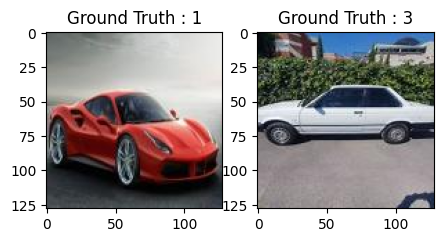

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

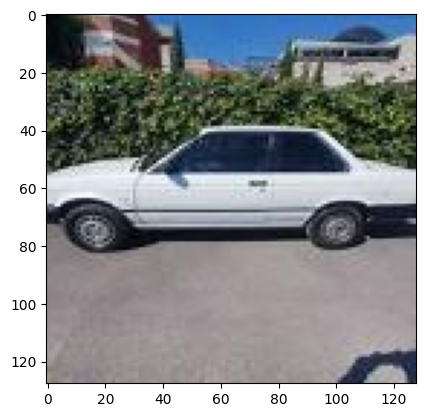

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(9280, 128, 128, 3) (2320, 128, 128, 3) (9280, 5) (2320, 5)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 25 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
# carros_model = Sequential()
# carros_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(64,64,3)))
# carros_model.add(LeakyReLU(alpha=0.1))
# carros_model.add(MaxPooling2D((2, 2),padding='same'))
# carros_model.add(Dropout(0.5))


# carros_model.add(Flatten())
# carros_model.add(Dense(32, activation='linear'))
# carros_model.add(LeakyReLU(alpha=0.1))
# carros_model.add(Dropout(0.5))
# carros_model.add(Dense(nClasses, activation='softmax'))

# carros_model = Sequential()
# carros_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(128,128,3)))
# carros_model.add(LeakyReLU(alpha=0.1))
# carros_model.add(MaxPooling2D((2, 2),padding='same'))
# carros_model.add(Dropout(0.5))

# carros_model.add(Flatten())
# carros_model.add(Dense(32, activation='linear'))
# carros_model.add(LeakyReLU(alpha=0.1))
# carros_model.add(Dropout(0.5))
# carros_model.add(Dense(nClasses, activation='softmax'))

# carros_model = Sequential([
#     Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 3)),
#     LeakyReLU(alpha=0.1),
#     BatchNormalization(),
#     MaxPooling2D((2, 2), padding='same'),
#     Dropout(0.5),

#     Conv2D(64, (3, 3), padding='same'),
#     LeakyReLU(alpha=0.1),
#     BatchNormalization(),
#     MaxPooling2D((2, 2), padding='same'),
#     Dropout(0.5),

#     Conv2D(128, (3, 3), padding='same'),
#     LeakyReLU(alpha=0.1),
#     BatchNormalization(),
#     MaxPooling2D((2, 2), padding='same'),
#     Dropout(0.5),

#     Flatten(),
#     Dense(128, activation='linear'),
#     LeakyReLU(alpha=0.1),
#     Dropout(0.5),
#     Dense(nClasses, activation='softmax'),
# ])

carros_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(nClasses, activation='softmax')
])

c:\Users\Leonardo\Desktop\CNN_CARROS\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
carros_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 0, 0, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 0, 0, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,957 (1.49 MB)

 Trainable params: 389,957 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# # Supongamos que INIT_LR es tu tasa de aprendizaje inicial
# INIT_LR = 0.01

# # Configura un optimizador actual compatible
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=INIT_LR,
#     decay_steps=100,  # Número de pasos para reducir la tasa de aprendizaje
#     decay_rate=0.96   # Factor de reducción
# )

# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# # Configura y compila el modelo
# carros_model.compile(
#     loss=keras.losses.categorical_crossentropy,
#     optimizer=optimizer,
#     metrics=['accuracy']
# )
# #carros_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# --------------------------------------------------------------------------

# INIT_LR = 0.01

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=INIT_LR,
#     decay_steps=100,
#     decay_rate=0.96
# )

# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# carros_model.compile(
#     loss=keras.losses.categorical_crossentropy,
#     optimizer=optimizer,
#     metrics=['accuracy']
# )

# -----------------------------------------------------------------------------
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir a la mitad
    patience=5,  # Si no mejora en 5 épocas
    min_lr=1e-6
)

carros_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR),
    metrics=['accuracy']
)


# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = carros_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/25


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 0, but received input with shape (64, 9216)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(64, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
carros_model.save("C:/Users/Leonardo/Desktop/CNN_CARROS/redneuronal/modelo.keras")


# Evaluamos la red

In [ ]:
test_eval = carros_model.evaluate(test_X, test_Y_one_hot, verbose=1)

109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8881 - loss: 0.6359


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6055817008018494
Test accuracy: 0.8899797797203064


In [ ]:
sport_train.history

{'accuracy': [0.4128531515598297,
  0.6746096014976501,
  0.7868038415908813,
  0.8405090570449829,
  0.8697535991668701,
  0.8946655988693237,
  0.9190360307693481,
  0.928693950176239,
  0.9451214075088501,
  0.9457532167434692,
  0.959653377532959,
  0.958209216594696,
  0.9716581106185913,
  0.9730120301246643,
  0.9761711359024048,
  0.971297025680542,
  0.9789692163467407,
  0.9744561910629272,
  0.9850167036056519,
  0.9798718094825745],
 'loss': [1.3760590553283691,
  0.8748910427093506,
  0.5797110199928284,
  0.4472791254520416,
  0.34556472301483154,
  0.28892093896865845,
  0.21812233328819275,
  0.195118710398674,
  0.15224957466125488,
  0.14973127841949463,
  0.11066368222236633,
  0.11459869146347046,
  0.07629169523715973,
  0.07948397099971771,
  0.07153249531984329,
  0.08113554120063782,
  0.060626424849033356,
  0.07492890954017639,
  0.04652470350265503,
  0.05730237811803818],
 'val_accuracy': [0.6202166080474854,
  0.7505415081977844,
  0.8252707719802856,
  0.8

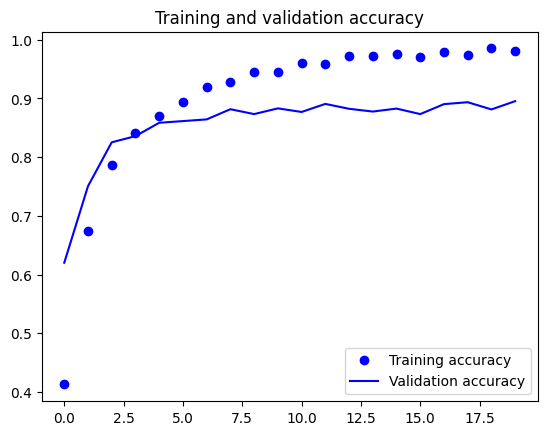

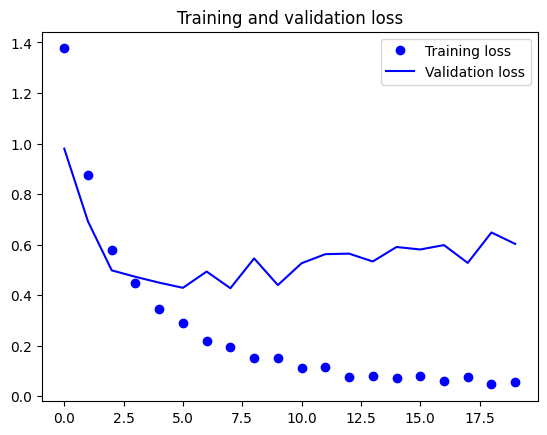

In [ ]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = carros_model.predict(test_X)

109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step


In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((3463,), (3463,))

# Aprendamos de los errores: Qué mejorar

Found 3082 correct labels


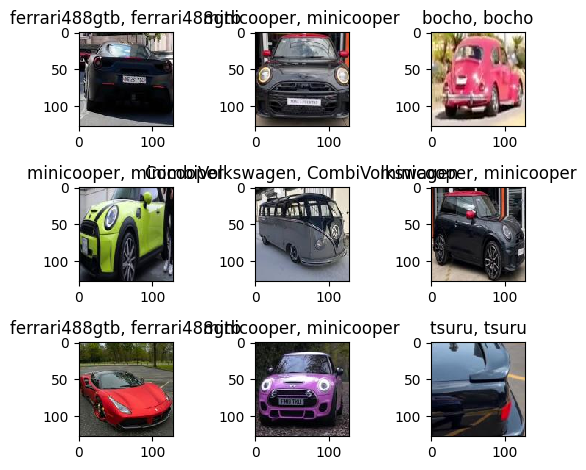

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(carros[predicted_classes[correct]],
                                                    carros[test_Y[correct]]))

    plt.tight_layout()

Found 381 incorrect labels


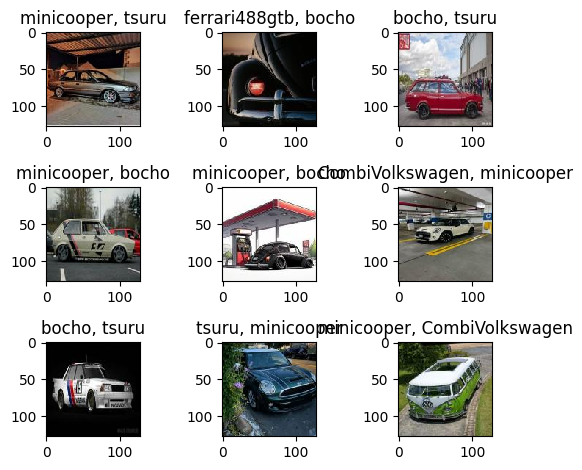

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(carros[predicted_classes[incorrect]],
                                                    carros[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.86      0.87       749
     Class 1       0.89      0.95      0.92       768
     Class 2       0.89      0.91      0.90       668
     Class 3       0.92      0.84      0.88       710
     Class 4       0.85      0.88      0.87       568

    accuracy                           0.89      3463
   macro avg       0.89      0.89      0.89      3463
weighted avg       0.89      0.89      0.89      3463



In [ ]:
# Normalizar imagenes para probar el dataset a 128 x 128

def normalize_images(input_folder, output_folder, target_size=(128, 128)):
    """
    Normaliza las imágenes de una carpeta especificada redimensionándolas a un tamaño fijo
    y guardándolas en una nueva carpeta sin perder calidad visual.

    :param input_folder: Ruta de la carpeta con las imágenes originales.
    :param output_folder: Ruta de la carpeta para guardar las imágenes normalizadas.
    :param target_size: Tamaño al que se redimensionarán las imágenes (alto, ancho).
    """
    # Crear la carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Recorrer las imágenes en la carpeta de entrada
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            
            try:
                # Leer la imagen
                image = imread(input_path)
                
                # Validar que la imagen tenga al menos 2 dimensiones (no esté corrupta)
                if image.ndim < 2:
                    print(f"Imagen no válida (menos de 2D): {filename}")
                    continue
                
                # Redimensionar la imagen al tamaño deseado
                image_resized = resize(
                    image, 
                    target_size, 
                    anti_aliasing=True, 
                    preserve_range=True
                )
                
                # Convertir la imagen a uint8 para guardar correctamente
                image_resized = np.clip(image_resized, 0, 255).astype(np.uint8)
                
                # Guardar la imagen redimensionada
                imsave(output_path, image_resized)
                print(f"Procesada: {filename} -> Guardada en {output_folder}")
            except Exception as e:
                print(f"Error al procesar {filename}: {e}")
    
    print(f"Todas las imágenes han sido normalizadas y guardadas en: {output_folder}")


# Ejemplo de uso
input_folder = "C:/Users/Leonardo/Desktop/CNN_CARROS/prueba"
output_folder = "C:/Users/Leonardo/Desktop/CNN_CARROS/img"
normalize_images(input_folder, output_folder)


Procesada: download.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img1.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img2.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img3.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img4.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img5.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img6.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img7.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img8.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Procesada: img9.jpg -> Guardada en C:/Users/Leonardo/Desktop/CNN_CARROS/img
Todas las imágenes han sido normalizadas y guardadas en: C:/Users/Leonardo/Desktop/CNN_CARROS/img


In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img1.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img2.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img3.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img4.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img5.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img6.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img7.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img8.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/img9.jpg',
                'C:/Users/Leonardo/Desktop/CNN_CARROS/img/download.jpg',
            ]

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (64, 64),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = carros_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], carros[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img1.jpg tsuru
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img2.jpg bocho
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img3.jpg CombiVolkswagen
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img4.jpg bocho
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img5.jpg minicooper
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img6.jpg minicooper
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img7.jpg CombiVolkswagen
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img8.jpg CombiVolkswagen
C:/Users/Leonardo/Desktop/CNN_CARROS/img/img9.jpg tsuru
C:/Users/Leonardo/Desktop/CNN_CARROS/img/download.jpg ferrari488gtb
